In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
import numpy as np
from matplotlib.colors import ListedColormap

df = pd.read_csv('/content/IRIS.csv')



In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
import numpy as np
from matplotlib.colors import ListedColormap

# Load the dataset
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
df = pd.read_csv(url)
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa



Visualizing pairplot...


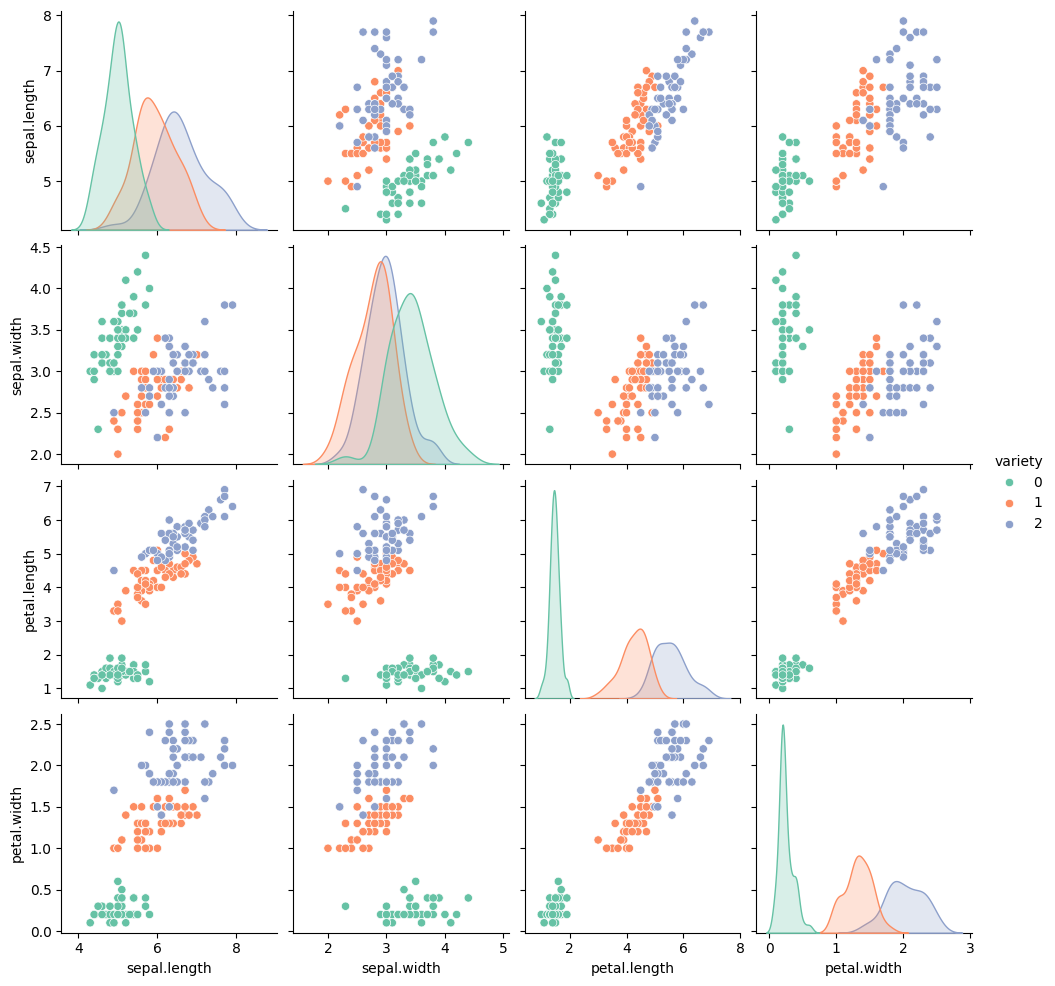

In [7]:
# # Convert the 'species' column to numerical categories
df['variety'] = pd.factorize(df['variety'])[0]

# Data Visualization
print("\nVisualizing pairplot...")
sns.pairplot(df, hue='variety', palette='Set2')
plt.show()


Visualizing correlation heatmap...


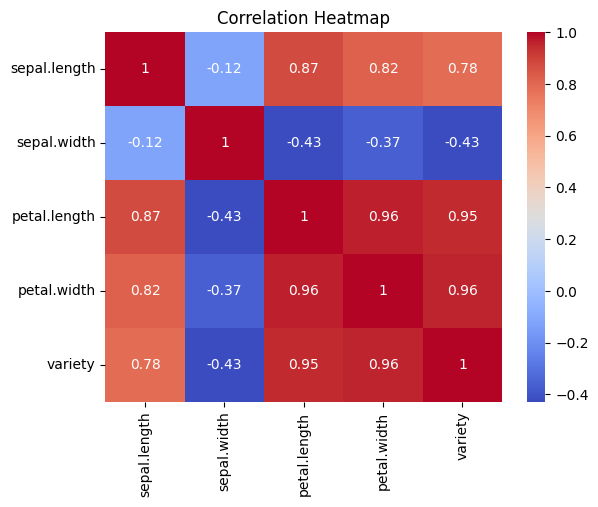

In [8]:
print("\nVisualizing correlation heatmap...")
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [9]:
# Feature Scaling
X = df.drop('variety', axis=1)
y = df['variety']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# Model Training (K-Nearest Neighbors) with Hyperparameter Tuning
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Model Evaluation
y_pred = grid_search.predict(X_test)

In [11]:
print("\nBest Parameters: ", grid_search.best_params_)
print("Best Cross-Validation Score: {:.2f}%".format(grid_search.best_score_ * 100))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Best Parameters:  {'n_neighbors': 3}
Best Cross-Validation Score: 94.29%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45




Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


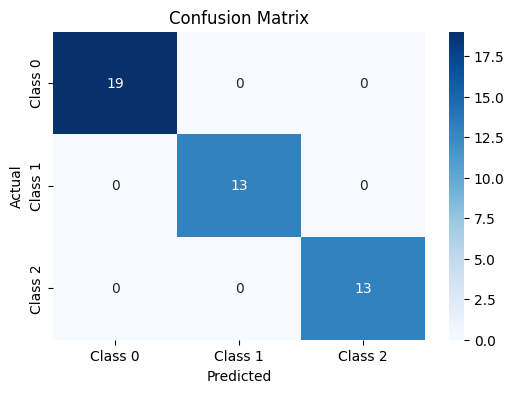

In [12]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualizing Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [13]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy of the model: {:.2f}%".format(accuracy * 100))


Accuracy of the model: 100.00%


In [14]:
# Train a separate model on the first two features for visualization
X_train_2d = X_train[:, :2]  # Use only the first two features
X_test_2d = X_test[:, :2]

knn_2d = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'])
knn_2d.fit(X_train_2d, y_train)

KNeighborsClassifier(n_neighbors=3)


Visualizing decision boundaries...


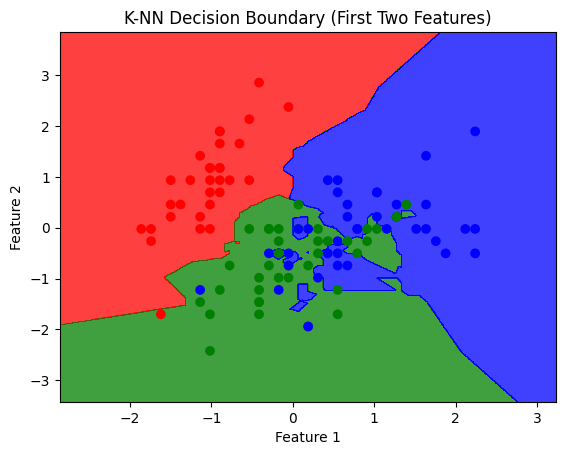

In [15]:
# Function to plot decision boundaries
def plot_decision_boundaries(X, y, model):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(X_set[:, 0].min() - 1, X_set[:, 0].max() + 1, 0.01),
                         np.arange(X_set[:, 1].min() - 1, X_set[:, 1].max() + 1, 0.01))
    plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha=0.75, cmap=ListedColormap(('red', 'green', 'blue')))
    plt.scatter(X_set[:, 0], X_set[:, 1], c=y_set, cmap=ListedColormap(('red', 'green', 'blue')))
    plt.title('K-NN Decision Boundary (First Two Features)')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plot decision boundaries for the first two features
print("\nVisualizing decision boundaries...")
plot_decision_boundaries(X_train_2d, y_train, knn_2d)